In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Load the data from the CSV into a DataFrame. 
# (Assume a dog_rates_tweets.csv file is in the same folder as the notebook file.)
data = pd.read_csv("dog_rates_tweets.csv", delimiter=",", parse_dates=['created_at'])
data

,id,created_at,text
0,994677639364403200,2018-05-10 20:36:44,@Steff88979267 tell them to h*ck off
1,994364904978239488,2018-05-09 23:54:02,@NFLOwnerGBP take it back
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...
3,994336722875047936,2018-05-09 22:02:03,@rachaellanaghan ❤️
4,994024065982717952,2018-05-09 01:19:40,This is Captain Jack Wobbles. He is currently ...
...,...,...,...
8510,1027980978910687233,2018-08-10 18:12:18,@GregWWoods thanks for donating $10.00 to @dog...
8511,1027976875811819520,2018-08-10 17:56:00,@DiannaC thanks for donating $10.00 to @dog_ra...
8512,1027970381766963202,2018-08-10 17:30:12,@runnjen @livelikeroo @Goodworld omg Justice y...
8513,1027967697684815873,2018-08-10 17:19:32,@shelbymorganart thanks for donating $10.00 to...


In [3]:
# Find tweets that contain an “n/10” rating (because not all do). 
# Extract the numeric rating. Exclude tweets that don't contain a rating.

pattern = r'\b\d+\/10\b'

rated_df = data[data['text'].str.contains(pattern)]
pattern = r'(\b\d+\/10\b)'

rated_df["rating"] = data['text'].str.extract(pattern)

pattern = r'(\d+)/10'
rated_df['rating_out_of_10'] = rated_df["rating"].str.extract(pattern).astype(int)

rated_df

,id,created_at,text,rating,rating_out_of_10
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14/10,14
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13/10,13
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14/10,14
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13/10,13
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13/10,13
...,...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14/10,14
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14/10,14
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13/10,13
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14/10,14


In [4]:
# Remove outliers: there are a few obvious ones. Exclude rating values that are too large to make sense. (Maybe larger than 25/10?)
df_sorted = rated_df.sort_values('rating_out_of_10')
df_sorted

,id,created_at,text,rating,rating_out_of_10
3302,835152434251116546,2017-02-24 15:40:31,When you're so blinded by your systematic plag...,0/10,0
5024,746906459439529985,2016-06-26 03:22:31,"PUPDATE: can't see any. Even if I could, I cou...",0/10,0
4177,798576900688019456,2016-11-15 17:22:24,RT @dog_rates: Not familiar with this breed. N...,1/10,1
5506,711306686208872448,2016-03-19 21:41:44,What hooligan sent in pictures w/out a dog in ...,3/10,3
5337,718246886998687744,2016-04-08 01:19:36,This is Alexanderson. He's got a weird ass bir...,3/10,3
...,...,...,...,...,...
1375,912115536229752832,2017-09-25 00:44:24,RT @dog_rates: After so many requests... here ...,420/10,420
1378,912103168309432320,2017-09-24 23:55:16,@GodDerpes_Leona @omfgemison there's been a 42...,420/10,420
2770,855862651834028034,2017-04-22 19:15:32,@dhmontgomery We also gave snoop dogg a 420/10...,420/10,420
2772,855860136149123072,2017-04-22 19:05:32,@s8n You tried very hard to portray this good ...,666/10,666


In [5]:
filtered_df = rated_df[rated_df['rating_out_of_10'] <= 25]

# Just to Check
df_sorted = filtered_df.sort_values('rating_out_of_10')
df_sorted

,id,created_at,text,rating,rating_out_of_10
5024,746906459439529985,2016-06-26 03:22:31,"PUPDATE: can't see any. Even if I could, I cou...",0/10,0
3302,835152434251116546,2017-02-24 15:40:31,When you're so blinded by your systematic plag...,0/10,0
4177,798576900688019456,2016-11-15 17:22:24,RT @dog_rates: Not familiar with this breed. N...,1/10,1
4494,777885040357281792,2016-09-19 15:00:20,This is Wesley. He's clearly trespassing. Seem...,3/10,3
5506,711306686208872448,2016-03-19 21:41:44,What hooligan sent in pictures w/out a dog in ...,3/10,3
...,...,...,...,...,...
501,949776574966124544,2018-01-06 22:55:56,@yashar smiley and piper have set a standard t...,15/10,15
6387,1088550291694223360,2019-01-24 21:33:08,"RT @BenSmithDC: Today, @dog_rates gave their 8...",15/10,15
3196,838085839343206401,2017-03-04 17:56:49,@bragg6of8 @Andy_Pace_ we are still looking fo...,15/10,15
1783,895773482436481024,2017-08-10 22:26:55,@SkyWilliams @Superthrust Sky 16/10 simply isn...,16/10,16


In [6]:
# Make sure the 'created_at' column is a datetime value, not a string.
created_at_column_type = filtered_df['created_at'].dtype
print(created_at_column_type)

datetime64[ns]


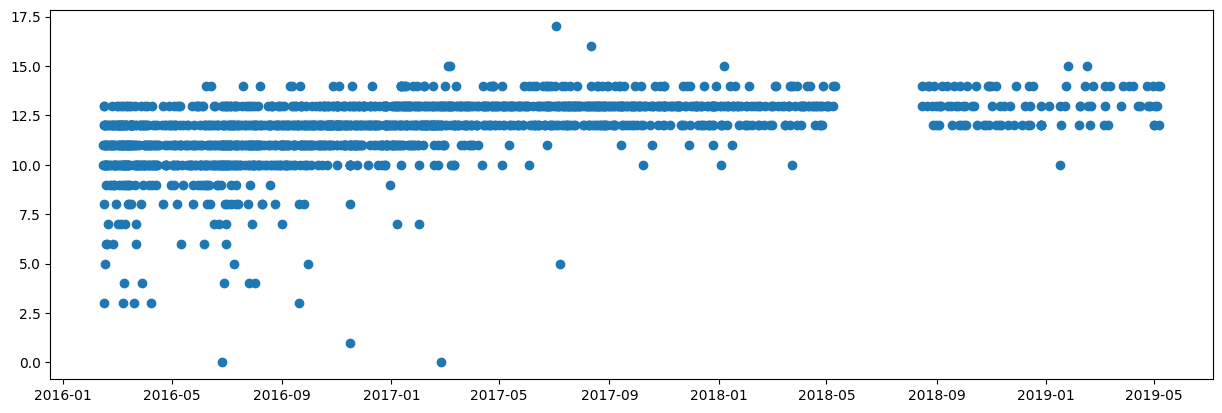

In [7]:
# Create a scatter plot of date vs rating, so you can see what the data looks like.
plt.figure().set_figwidth(15)
plt.scatter(filtered_df['created_at'], filtered_df['rating_out_of_10'])
plt.show()

# Linear Fitting

In [8]:
def to_timestamp(dt):
    return dt.timestamp()

filtered_df['timestamp'] = filtered_df['created_at'].apply(to_timestamp)
filtered_df

,id,created_at,text,rating,rating_out_of_10,timestamp
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14/10,14,1.525910e+09
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13/10,13,1.525797e+09
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14/10,14,1.525735e+09
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13/10,13,1.525394e+09
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13/10,13,1.525285e+09
...,...,...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14/10,14,1.535056e+09
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14/10,14,1.534957e+09
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13/10,13,1.534811e+09
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14/10,14,1.534351e+09


In [9]:
# Extract X and Y columns as NumPy arrays
x = filtered_df['timestamp'].values
y = filtered_df['rating_out_of_10'].values

# Apply linear regression using linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Print the slope and intercept
print("Slope:", slope)
print("Intercept:", intercept)

Slope: 3.499430060747977e-08
Intercept: -40.22121484842027


# Results

In [10]:
# Prediction Data
# predicted_y = slope * new_x + intercept
filtered_df["prediction"] = slope * filtered_df['timestamp'] + intercept
filtered_df

,id,created_at,text,rating,rating_out_of_10,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14/10,14,1.525910e+09,13.176929
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13/10,13,1.525797e+09,13.172970
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14/10,14,1.525735e+09,13.170805
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13/10,13,1.525394e+09,13.158866
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13/10,13,1.525285e+09,13.155073
...,...,...,...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14/10,14,1.535056e+09,13.496995
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14/10,14,1.534957e+09,13.493529
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13/10,13,1.534811e+09,13.488408
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14/10,14,1.534351e+09,13.472313


In [11]:
slope, intercept

(3.499430060747977e-08, -40.22121484842027)

In [12]:
# Add Best Fit Line 
# To add the best-fit line, you can plot data['created_at'] 
# against data['timestamp']*fit.slope + fit.intercept 
# to get a fit line (assuming you stored the results of linregress in a variable fit).
# Here are some hints to style the plot as it appears in my screenshot, which seems to look nice enough:

# plt.xticks(rotation=25)
# plt.plot(???, ???, 'b.', alpha=0.5)
# plt.plot(???, ???, 'r-', linewidth=3)

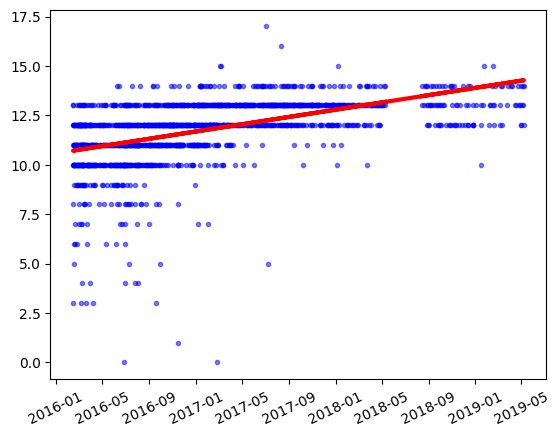

In [13]:
plt.xticks(rotation=25)
plt.plot(filtered_df['created_at'], filtered_df['rating_out_of_10'], 'b.', alpha=0.5)
plt.plot(filtered_df['created_at'], filtered_df['timestamp']*slope + intercept, 'r-', linewidth=3)
plt.show()